# 1. Import Libraries

In [1]:
# import pandas, numpy, and matplotlib libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2. Import Pell Data Set

In [2]:
# import csv vile into pandas data frame
df = pd.read_csv("data/pell_totals.csv",index_col='Institution').drop('UnitID',axis=1)

In [3]:
# check first few records. 
# each row is a higher education institution.
# column is total pell amount received by years (2020-2008)
df.head()

,PELL2020,PELL2019,PELL2018,PELL2017,PELL2016,PELL2015,PELL2014,PELL2013,PELL2012,PELL2011,PELL2010,PELL2009,PELL2008
Institution,,,,,,,,,,,,,
A Better U Beauty Barber Academy,194325.0,161933.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A T Still University of Health Sciences,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aaniiih Nakoda College,444680.0,442992.0,399307.0,418116.0,432126.0,436094.0,495700.0,292049.0,349002.0,326051.0,341833.0,492751.0,419882.0
ABC Adult School,327310.0,417983.0,263776.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ABC Beauty Academy,599409.0,222059.0,103890.0,128796.0,0.0,NaN,175004.0,107791.0,110439.0,199886.0,116749.0,2775.0,NaN


# 3. Format Data and Create New Columns

In [4]:
# replace NaN with 0
df = df.fillna(0)

df = df/1000000

In [5]:
# reverse the order of the columns in df2
df = df.iloc[:, ::-1]


In [6]:
# create new column Pell Total which totals the Pell grant received by each institution
df['PellTotal'] = df.sum(axis=1)

# 4. Top Institutions (Most Dollars Received)

### Top Institutions Returned as a DataFrame

In [7]:
# Define function that will return institutions that received the most dollars in millions
def top_inst(num): # num = number of institutions
    top = df.sort_values(by="PellTotal",ascending=False)['PellTotal'].to_frame().head(num)
    return top

In [8]:
# top 10 institutions
df_top = top_inst(10)

In [9]:
df_top

,PellTotal
Institution,
University of Phoenix-Arizona,1804.726754
Miami Dade College,1617.699612
Ivy Tech Community College,1506.624805
Ashford University,1193.879106
Grand Canyon University,1123.961983
Florida International University,1107.750062
Houston Community College,1053.437359
University of Central Florida,1032.510372
California State University-Northridge,1014.970679


### Top Institutions Plotted as a Bar Plot

In [10]:
# function which does a bar plot of top institutions
def plot_top(d, num):
    
    top = d.sort_values(by="PellTotal",ascending=False)['PellTotal'].to_frame().head(num)
    
    
    # Set the font size for the labels
    label_fontsize = 4

    # Increase the size of the graph
    fig_width = 10
    fig_height =8 
    
    plt.figure(figsize=(fig_width, fig_height))
    plt.grid()

    plt.bar(top.index, top['PellTotal'])
    plt.xlabel('Institution',fontsize=label_fontsize)
    plt.ylabel('Millions')
    plt.title('Pell Totals - 2008 - 2020')
    plt.xticks(rotation=90)

    # Show the labels based on the index values
    plt.xticks(ticks=range(len(top.index)), labels=top.index)

    plt.tight_layout()
    plt.show()

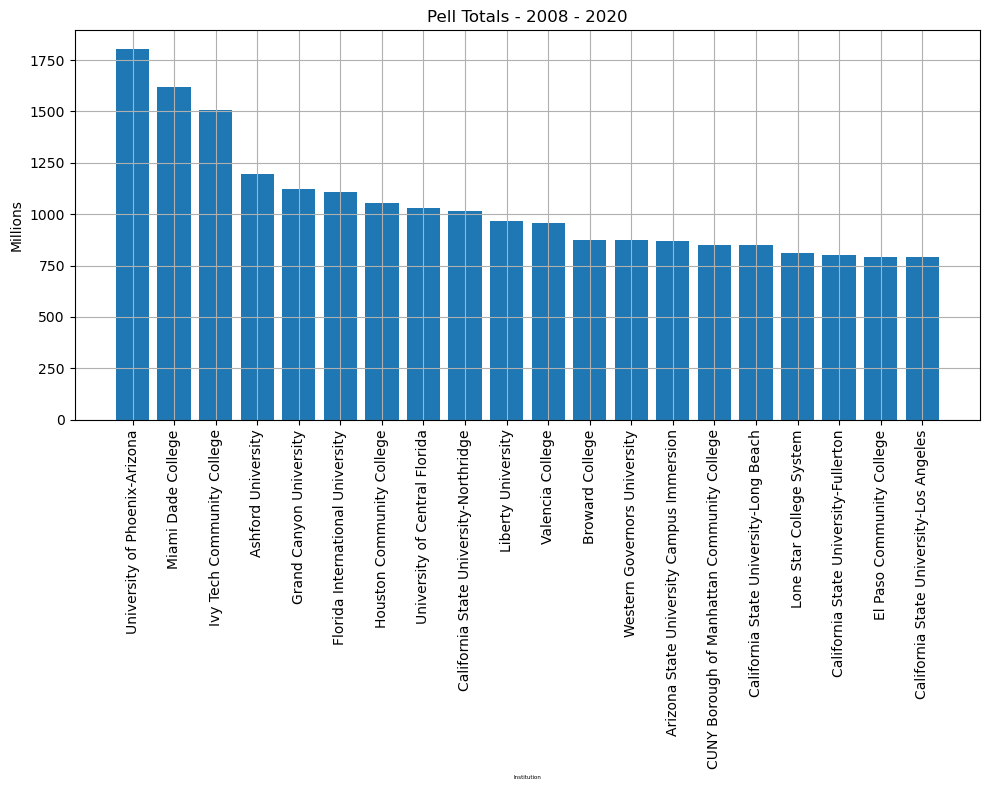

In [11]:
plot_top(df,20)


 # 5. Individual Institutions
    


In [12]:
# function Returns Pell Amount by Year
def get_inst(d, institution):
    row = d.loc[institution].to_frame()
    return row



In [13]:
# Example usage
inst = "Ashford University"
r = get_inst(df, inst)
r

,Ashford University
PELL2008,34.464176
PELL2009,92.063044
PELL2010,144.739196
PELL2011,167.526583
PELL2012,161.030937
PELL2013,109.039133
PELL2014,93.696056
PELL2015,73.532447
PELL2016,80.581515
PELL2017,73.524325


In [22]:
# function plots 
def plot_inst(dataframe,institution):
    row = dataframe.loc[institution].to_frame().drop('PellTotal')
    

    x_values = range(len(row))
    y_values = row.values

    plt.bar(row.index, row[institution])
    plt.xlabel('Year')
    plt.ylabel('Pell Total (Millions)')
    plt.title('%s' %institution)
    plt.xticks(x_values, row.index, rotation=90)  # Set x-axis labels as column names with rotation
    plt.tight_layout()
    plt.show()
    plt.tight_layout()
    plt.show()


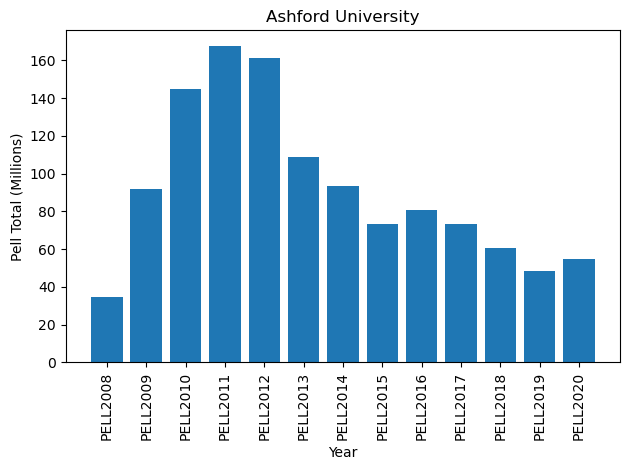

<Figure size 640x480 with 0 Axes>

In [23]:
plot_inst(df,'Ashford University')